# **Wine Quality Datasets**

In this notebook, I will be looking at two wine datasets (one for white wines, one for reds). The goals here are to practice exploratory data analysis and some different visualization techniques, and later to use machine learning models to try to predict wine quality ratings. I would always appreciate any feedback available!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#This will just make the notebook easier to read down the line
import warnings
from operator import itemgetter
warnings.filterwarnings('ignore')

In [3]:
#Read in the two wine datasets
whiteWine = pd.read_csv('Downloads/winequality-white.csv', sep=';')
whiteWine['quality'] = pd.Categorical(whiteWine.quality)

redWine = pd.read_csv('Downloads/winequality-red.csv', sep=';')
redWine['quality'] = pd.Categorical(redWine.quality)

## Exploratory Data Analysis

We'll start with some exploratory data analysis on our two wine datasets

### White Wine

In [4]:
#Check the top of our white wine dataframe
whiteWine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol quality  
0      8.8       6  
1      9.5       6  
2     10.1       6  
3      9.9       6  
4      9.9       6

In [5]:
#More info about our data
whiteWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267  
std       0.151001     0.114126     1.230621  
min       2.720000     0.220000     8.000000  
25%       3.090000     0.410000     9.500000  
50%       3.180000     0.470000    10.400000  
75%       3.280000     0.550000    11.400000  
max       3.820000     1.080000    14.200000

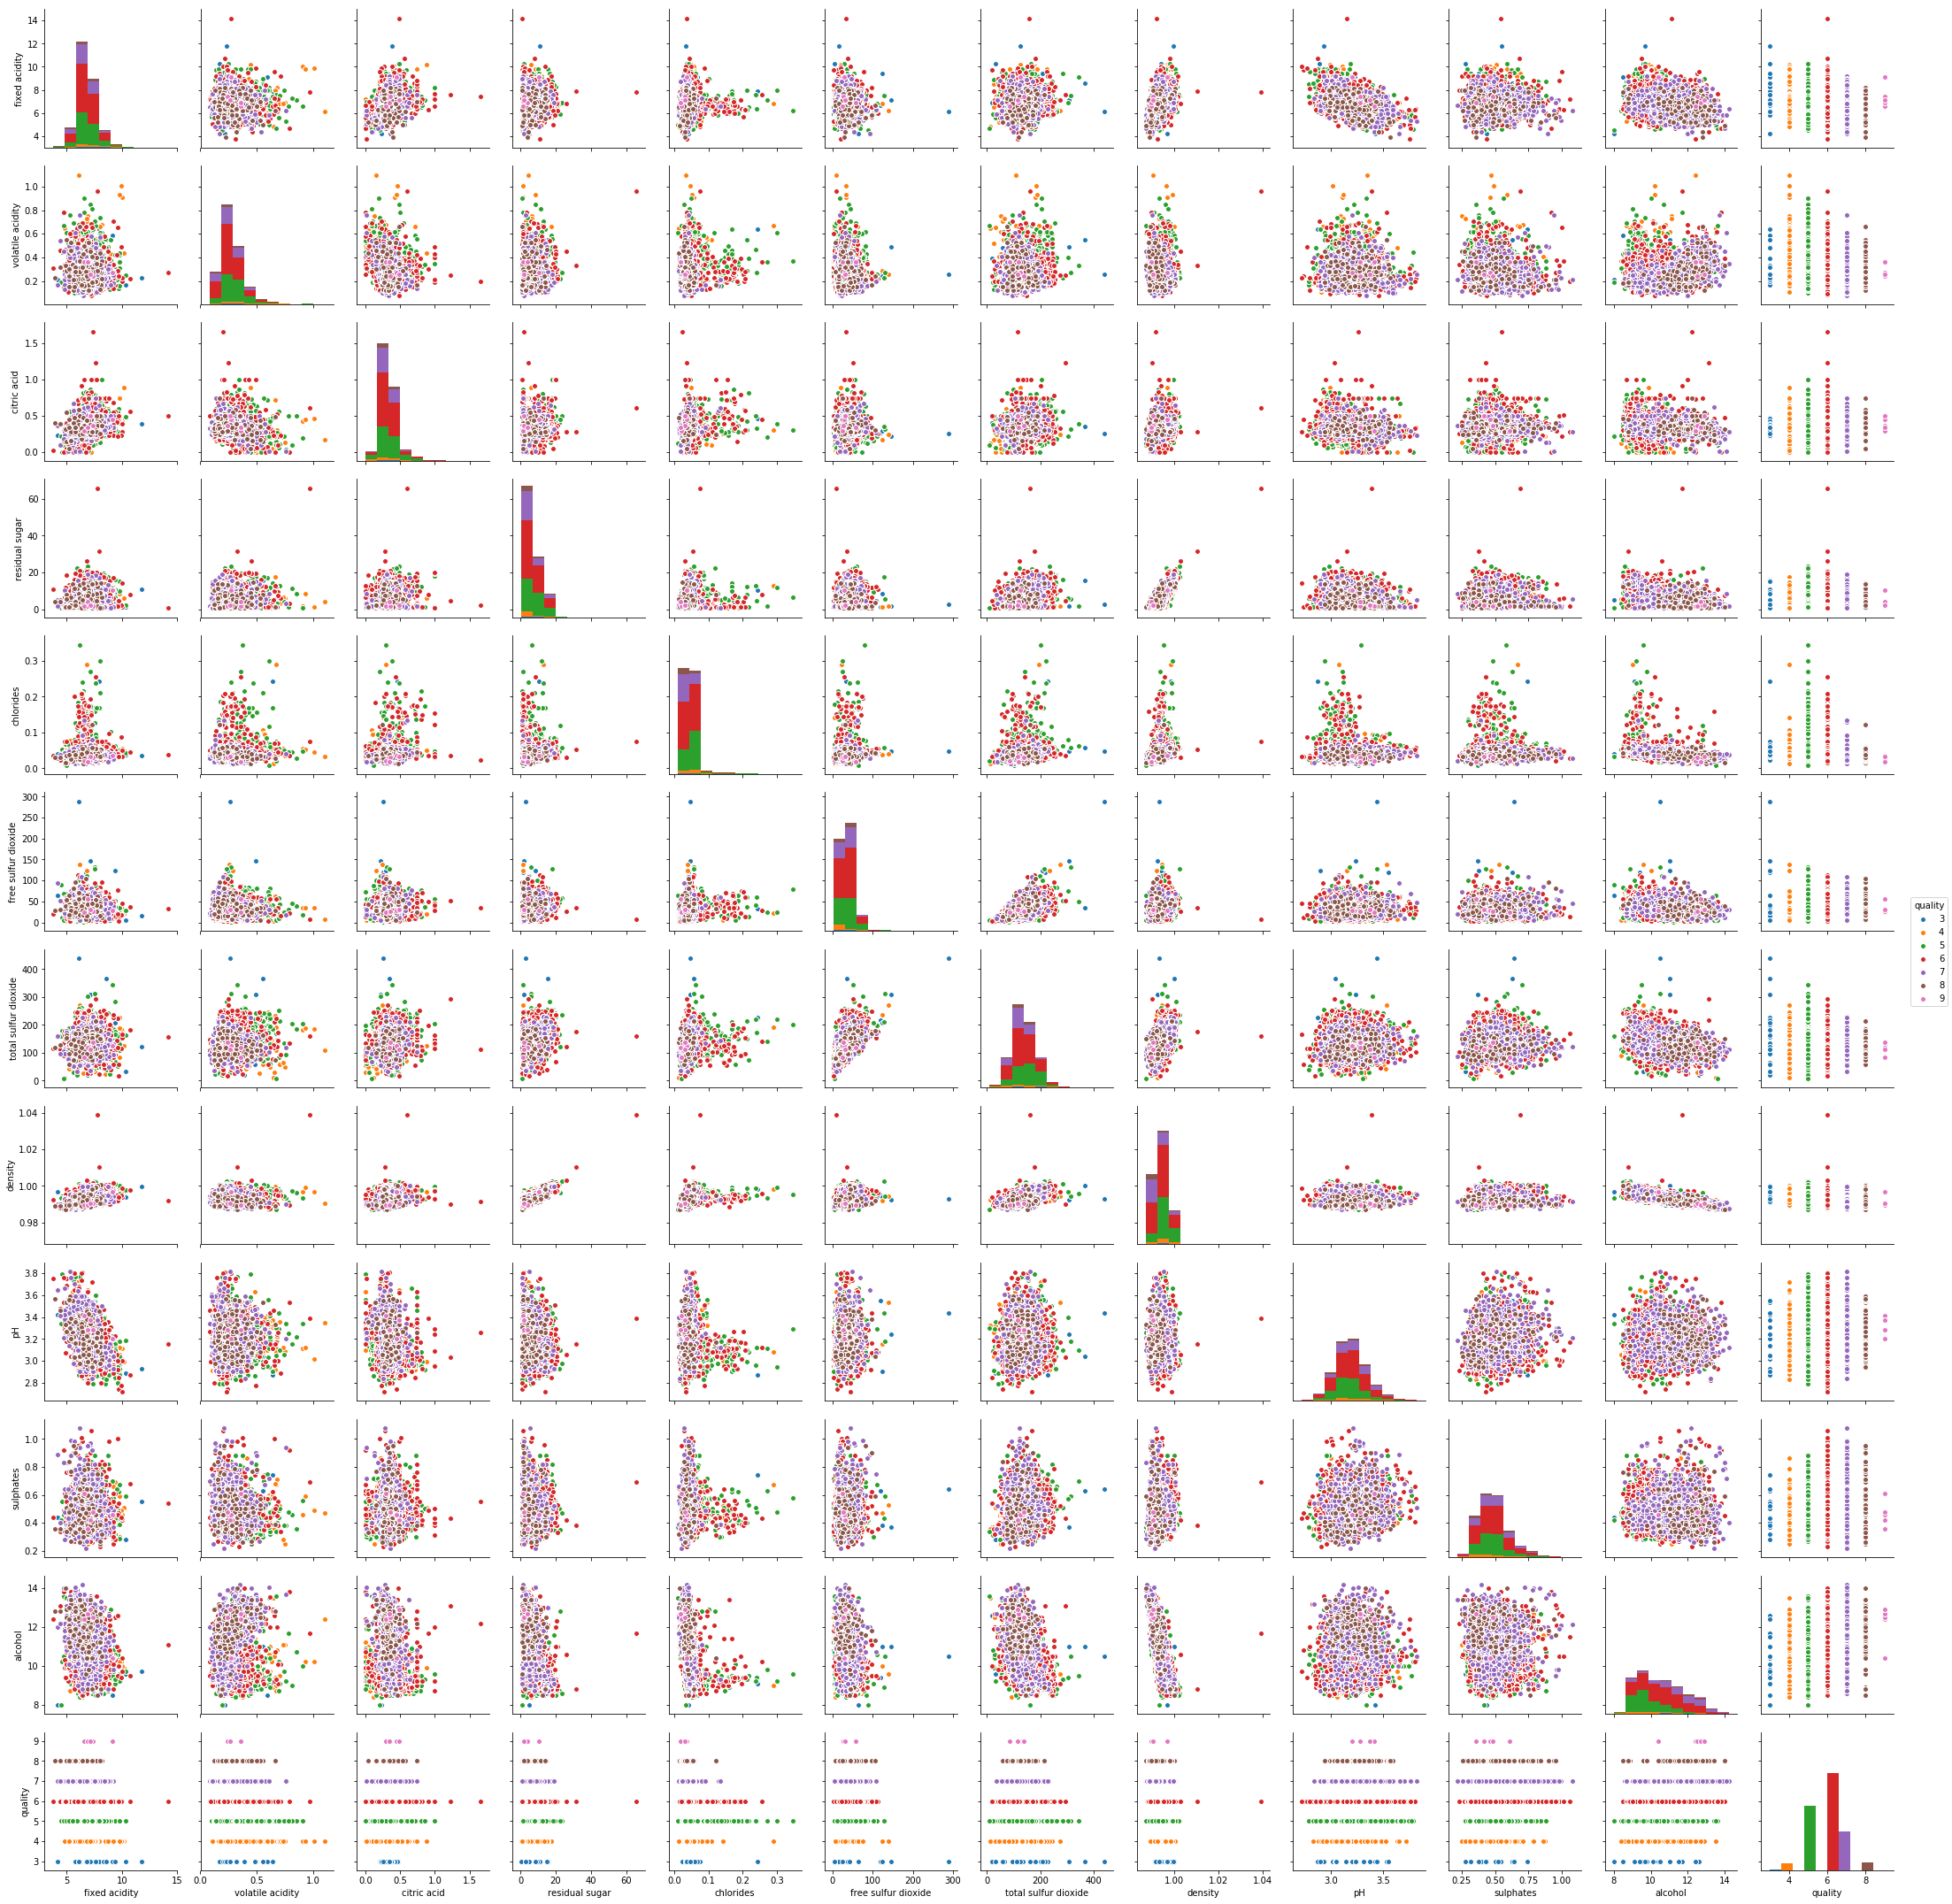

In [6]:
#We'll start with a pairplot differntiated by the rated wine quality
sns.pairplot(data=whiteWine, hue='quality')

### Red Wine

In [7]:
#Check the top of our red wine dataframe
redWine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4       5  
1      9.8       5  
2      9.8       5  
3      9.8       6  
4      9.4       5

In [8]:
#Get some more info on our data
redWine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

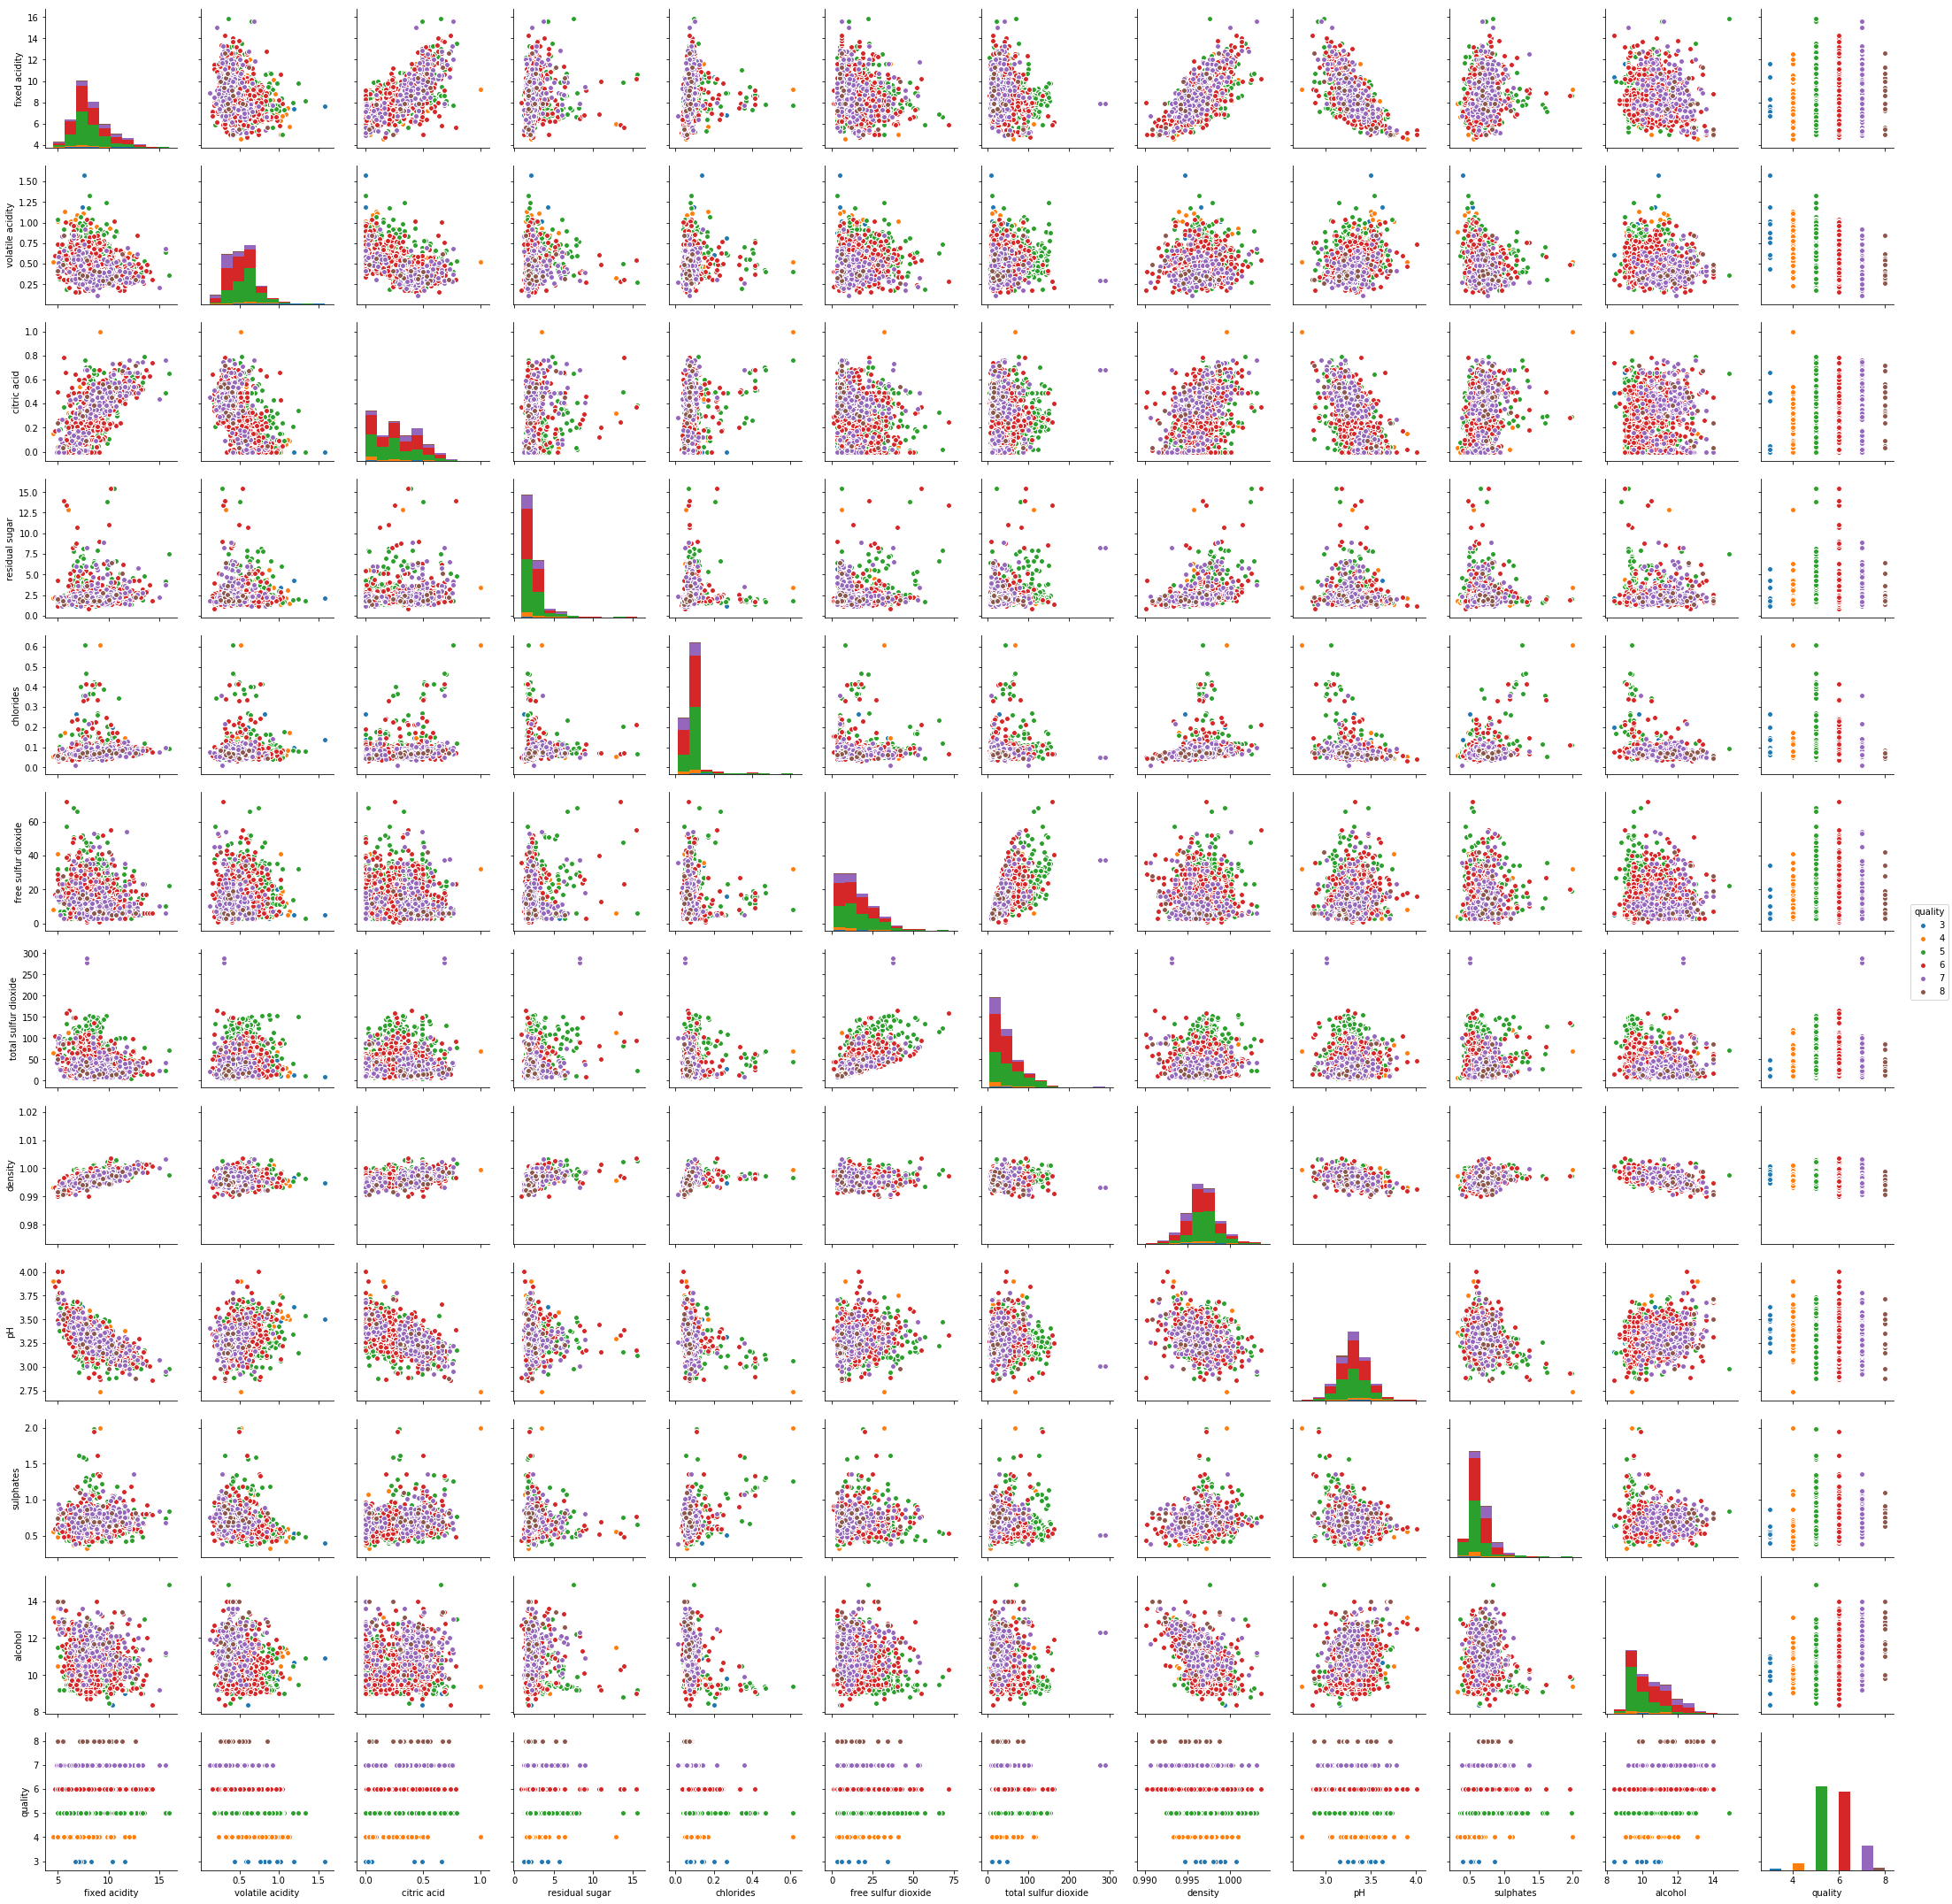

In [9]:
#We'll look at a pairplot of our red wine data now, again differentiated by wine quality
sns.pairplot(data=redWine, hue='quality')

### All Wine Together

We'll put our two datasets together to look at all of our wine together

In [10]:
#Prep the data for a master dataframe made of the two original sets
whiteWineCopy = whiteWine.copy()
redWineCopy = redWine.copy()
whiteWineCopy['wine type'] = 'white'
redWineCopy['wine type'] = 'red'

In [11]:
#Make dataframe for all our wine and check the head
allWine = whiteWineCopy.append(redWineCopy, ignore_index=True)
allWine.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine type  
0      8.8        6     white  
1      9.5        6     white  
2     10.1        6     white  
3      9.9        6     white  
4      9.9        6     white

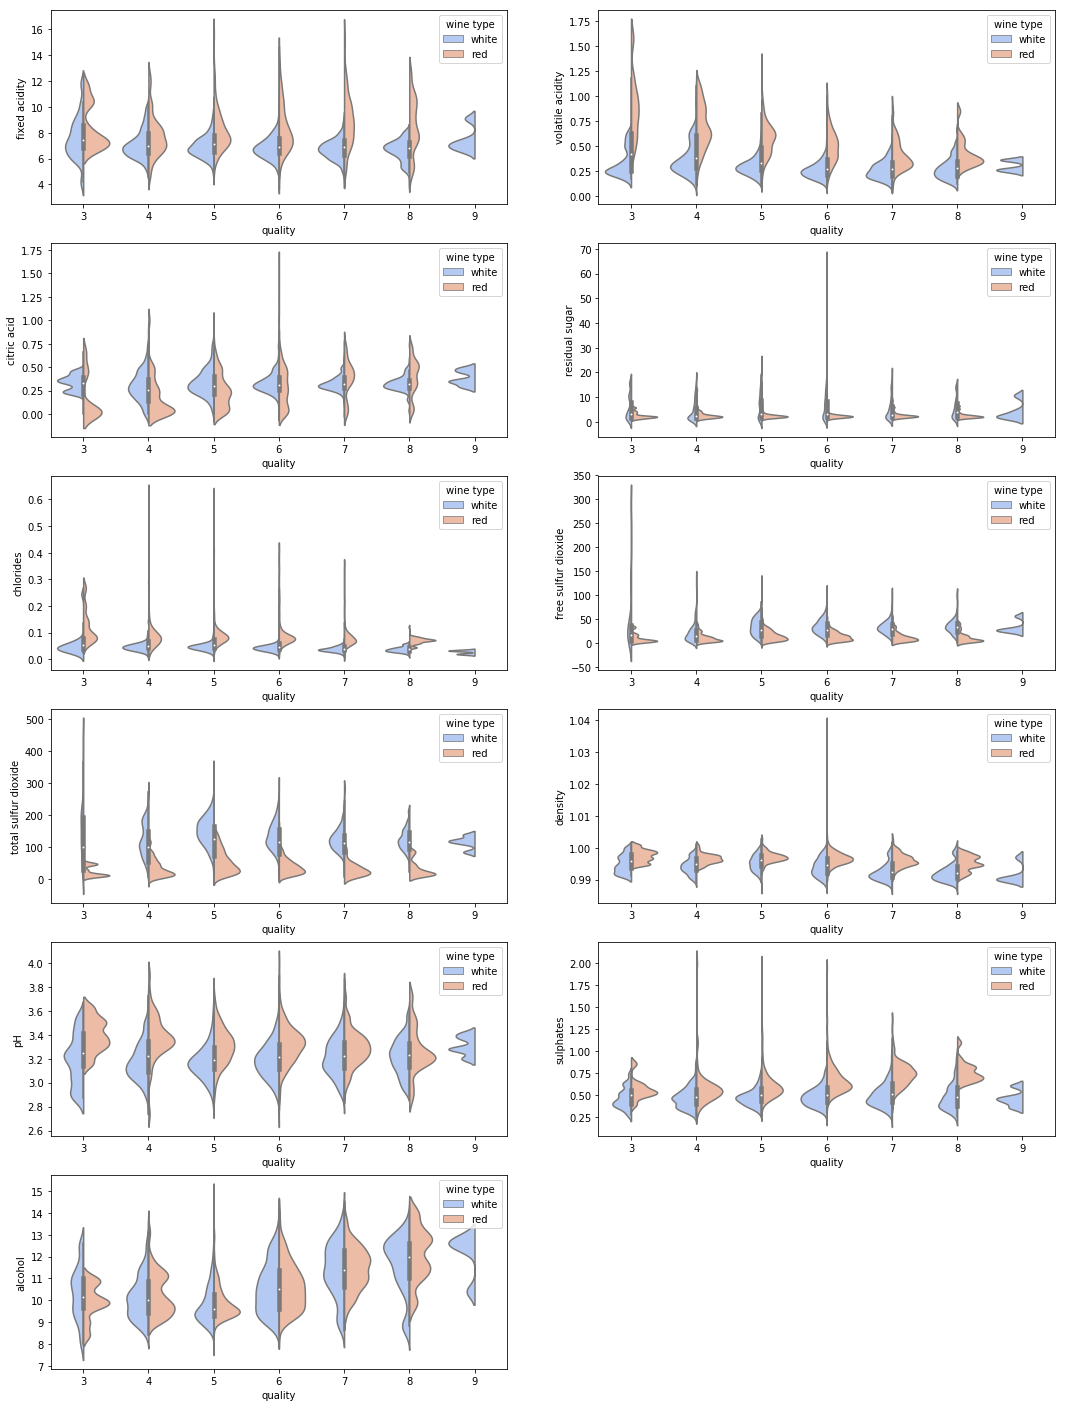

In [12]:
#Let's try looking at each of the columns against quality
plt.figure(figsize=(18,25))
plt.subplot(6,2,1)
sns.violinplot(x='quality', y='fixed acidity', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,2)
sns.violinplot(x='quality', y='volatile acidity', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,3)
sns.violinplot(x='quality', y='citric acid', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,4)
sns.violinplot(x='quality', y='residual sugar', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,5)
sns.violinplot(x='quality', y='chlorides', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,6)
sns.violinplot(x='quality', y='free sulfur dioxide', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,7)
sns.violinplot(x='quality', y='total sulfur dioxide', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,8)
sns.violinplot(x='quality', y='density', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,9)
sns.violinplot(x='quality', y='pH', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,10)
sns.violinplot(x='quality', y='sulphates', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)
plt.subplot(6,2,11)
sns.violinplot(x='quality', y='alcohol', data=allWine, palette='coolwarm', hue='wine type', split=True, bw=0.3)

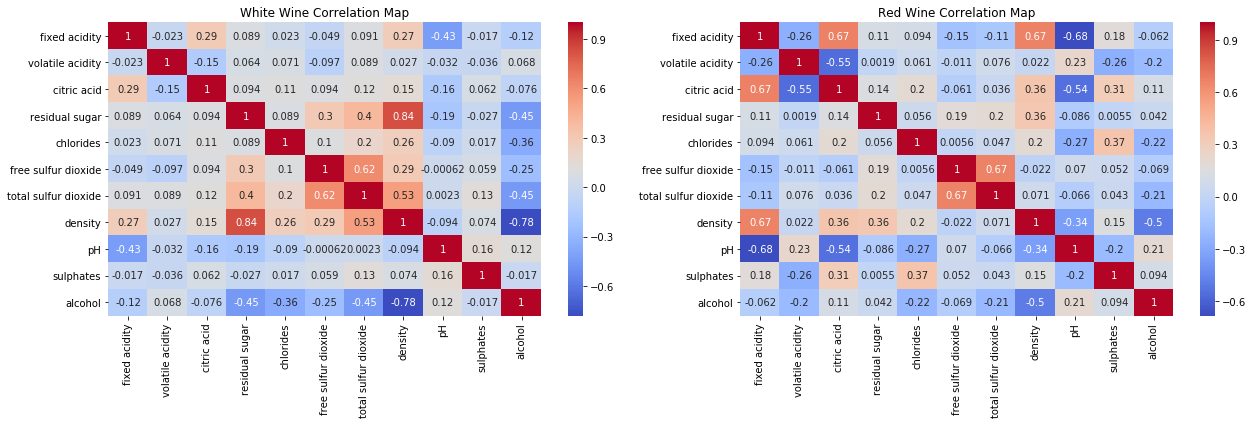

In [13]:
#We can look at correlation heatmaps for each of our wines
plt.figure(figsize =(18, 6))
plt.subplot(1,2,1)
plt.title('White Wine Correlation Map')
sns.heatmap(whiteWine.corr(), annot=True, cmap='coolwarm')
plt.subplot(1,2,2)
plt.title('Red Wine Correlation Map')
sns.heatmap(redWine.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

In [14]:
#Get our quality counts for the next parts
print(whiteWine['quality'].value_counts())
print(redWine['quality'].value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


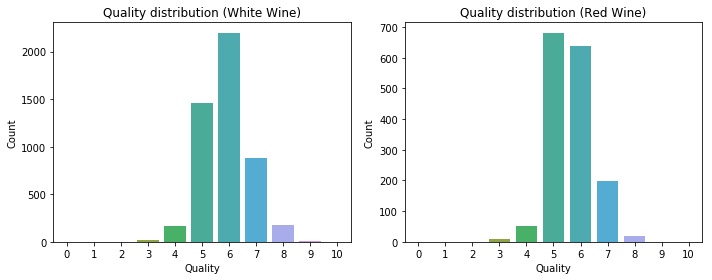

In [15]:
#Look at some bar plots for the distribution of qualities
names = [i for i in range(0, 11)]
sizeW = [0, 0, 0, 20, 163, 1457, 2198, 880, 175, 5, 0]
sizeR = [0, 0, 0, 10, 53, 681, 638, 199, 18, 0, 0]
plt.figure(figsize =(10, 4))
#White Wine
plt.subplot(1,2,1)
plt.title('Quality distribution (White Wine)')
plt.xlabel('Quality')
plt.ylabel('Count')
sns.barplot(x=names, y=sizeW)
#Red Wine
plt.subplot(1,2,2)
sns.barplot(x=names, y=sizeR)
plt.title('Quality distribution (Red Wine)')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.tight_layout()

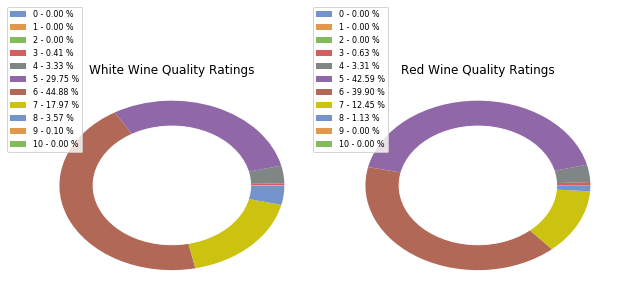

In [16]:
#Now look at the breakdown percentages of quality for each wine
plt.figure(figsize =(10, 4))
plt.subplot(1,2,1)
colors=["#396ab1", "#da7c30", "#3e9651", "#cc2529", "#535154", "#6b4c9a", "#922428", "#948b3d"]
colors2=["#7293cb", "#e1974c", "#84ba5b", "#d35e60", "#808585", "#9067a7", "#b16857", "#ccc210"]
#White Wines
plt.title('White Wine Quality Ratings')
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
size = [0, 0, 0, 20, 163, 1457, 2198, 880, 175, 5, 0]
percent = [100.*(x/sum(size)) for x in size]
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(names, percent)]
graph, texts = plt.pie(size, colors=colors2)
plt.legend(graph, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,2,2)
#Red Wines
plt.title('Red Wine Quality Ratings')
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
size = [0, 0, 0, 10, 53, 681, 638, 199, 18, 0, 0]
percent = [100.*(x/sum(size)) for x in size]
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(names, percent)]
graph, texts = plt.pie(size, colors=colors2)
plt.legend(graph, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout(pad=0, h_pad=0, w_pad=0, rect=[0, 0, 0.85, 1])

## Machine Learning Models

We'll try using K Nearest Neighbors, Random Forests, and Support Vector Machines on our datasets to predict wine quality

In [17]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [18]:
#We start with our train test split for each of our datasets
Xw = whiteWine.drop('quality', axis=1)
yw = whiteWine['quality']
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.30)

Xr = redWine.drop('quality', axis=1)
yr = redWine['quality']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.30)

### White Wine

#### K Nearest Neighbors

In [19]:
#We'll start by figuring out a good n value for our KNN model
error_rate_w = []

for i in range(1,40):
    
    knn_w = KNeighborsClassifier(n_neighbors=i)
    knn_w.fit(Xw_train,yw_train)
    pred_w_i = knn_w.predict(Xw_test)
    error_rate_w.append(np.mean(pred_w_i != yw_test))

Text(0,0.5,'Error Rate')

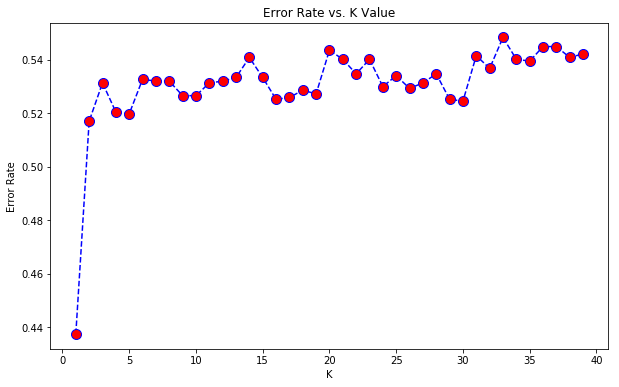

In [20]:
#We can look at the graph to see what n values give us lower error rates
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_w,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
#We will use the n that has the lowest error rate
knn_w = KNeighborsClassifier(n_neighbors=(min(enumerate(error_rate_w), key=itemgetter(1))[0])+1)
knn_w.fit(Xw_train,yw_train)
pred_w_knn = knn_w.predict(Xw_test)

In [22]:
#Here is our classification report and confusion matrix for the KNN model
print(classification_report(yw_test, pred_w_knn))
print(confusion_matrix(yw_test, pred_w_knn))
#Print accuracy scores
print('Using KNN on White Wine data:')
print('The accuracy is ' + str(accuracy_score(yw_test, pred_w_knn)))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.33      0.20      0.25        51
          5       0.61      0.58      0.59       464
          6       0.60      0.64      0.62       632
          7       0.46      0.48      0.47       256
          8       0.41      0.36      0.39        58
          9       0.00      0.00      0.00         1

avg / total       0.56      0.56      0.56      1470

[[  0   1   3   3   1   0   0]
 [  2  10  13  20   5   1   0]
 [  4   9 267 141  39   4   0]
 [  2  10 113 406  82  18   1]
 [  0   0  35  91 123   7   0]
 [  0   0   5  17  15  21   0]
 [  0   0   0   1   0   0   0]]
Using KNN on White Wine data:
The accuracy is 0.562585034014


#### Random Forest

In [23]:
#We'll make the model and fit it to the training data using 100 estimators
rfc_w = RandomForestClassifier(n_estimators=100)
rfc_w.fit(Xw_train, yw_train)
pred_w_rfc = rfc_w.predict(Xw_test)

In [24]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(yw_test, pred_w_rfc))
print(confusion_matrix(yw_test, pred_w_rfc))
#Print accuracy scores
print('Using a Random Forest on White Wine data:')
print('The accuracy is ' + str(accuracy_score(yw_test, pred_w_rfc)))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.60      0.18      0.27        51
          5       0.73      0.69      0.71       464
          6       0.64      0.81      0.72       632
          7       0.70      0.54      0.61       256
          8       0.91      0.34      0.50        58
          9       0.00      0.00      0.00         1

avg / total       0.69      0.68      0.67      1470

[[  0   0   3   5   0   0   0]
 [  0   9  28  14   0   0   0]
 [  0   6 318 135   5   0   0]
 [  0   0  78 515  38   1   0]
 [  0   0   7 109 139   1   0]
 [  0   0   1  21  16  20   0]
 [  0   0   0   0   1   0   0]]
Using a Random Forest on White Wine data:
The accuracy is 0.680952380952


#### Support Vector Machine

In [25]:
#We'll make and fit our SVM model
svc_model_w = SVC()
svc_model_w.fit(Xw_train,yw_train)
pred_w_svc = svc_model_w.predict(Xw_test)

In [26]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(yw_test, pred_w_svc))
print(confusion_matrix(yw_test, pred_w_svc))
#Print accuracy scores
print('Using an SVM on White Wine data:')
print('The accuracy is ' + str(accuracy_score(yw_test, pred_w_svc)))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         8
          4       0.50      0.04      0.07        51
          5       0.62      0.50      0.55       464
          6       0.52      0.79      0.63       632
          7       0.52      0.28      0.36       256
          8       0.86      0.10      0.18        58
          9       0.00      0.00      0.00         1

avg / total       0.56      0.55      0.52      1470

[[  0   0   1   6   1   0   0]
 [  0   2  13  35   1   0   0]
 [  0   0 231 217  16   0   0]
 [  0   2  92 497  40   1   0]
 [  0   0  30 154  72   0   0]
 [  0   0   5  38   9   6   0]
 [  0   0   0   1   0   0   0]]
Using an SVM on White Wine data:
The accuracy is 0.549659863946


### Red Wine

#### K Nearest Neighbors

In [27]:
#We'll start by figuring out a good n value for our KNN model, this time we'll skip the visualization
error_rate_r = []

for i in range(1,40):
    
    knn_r = KNeighborsClassifier(n_neighbors=i)
    knn_r.fit(Xr_train,yr_train)
    pred_i_r = knn_r.predict(Xr_test)
    error_rate_r.append(np.mean(pred_i_r != yr_test))

In [28]:
#We will use the n that has the lowest error rate
knn_r = KNeighborsClassifier(n_neighbors=(min(enumerate(error_rate_r), key=itemgetter(1))[0])+1)
knn_r.fit(Xr_train,yr_train)
pred_r_knn = knn_r.predict(Xr_test)

In [29]:
#Here is our classification report and confusion matrix for the KNN model
print(classification_report(yr_test, pred_r_knn))
print(confusion_matrix(yr_test, pred_r_knn))
#Print accuracy scores
print('Using KNN on Red Wine data:')
print('The accuracy is ' + str(accuracy_score(yr_test, pred_r_knn)))

             precision    recall  f1-score   support

          3       0.50      0.50      0.50         2
          4       0.08      0.22      0.12         9
          5       0.71      0.64      0.67       214
          6       0.59      0.57      0.58       201
          7       0.46      0.50      0.48        52
          8       0.00      0.00      0.00         2

avg / total       0.62      0.58      0.60       480

[[  1   0   1   0   0   0]
 [  0   2   4   2   0   1]
 [  0   7 137  58  11   1]
 [  1  13  49 114  20   4]
 [  0   1   3  18  26   4]
 [  0   1   0   1   0   0]]
Using KNN on Red Wine data:
The accuracy is 0.583333333333


#### Random Forest

In [30]:
#We'll make the model and fit it to the training data using 100 estimators
rfc_r = RandomForestClassifier(n_estimators=100)
rfc_r.fit(Xr_train, yr_train)
pred_r_rfc = rfc_r.predict(Xr_test)

In [31]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(yr_test, pred_r_rfc))
print(confusion_matrix(yr_test, pred_r_rfc))
#Print accuracy scores
print('Using a Random Forest on Red Wine data:')
print('The accuracy is ' + str(accuracy_score(yr_test, pred_r_rfc)))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         9
          5       0.76      0.75      0.75       214
          6       0.65      0.71      0.68       201
          7       0.63      0.52      0.57        52
          8       0.00      0.00      0.00         2

avg / total       0.68      0.69      0.68       480

[[  0   0   2   0   0   0]
 [  0   0   6   2   1   0]
 [  0   1 161  51   1   0]
 [  0   2  43 143  13   0]
 [  0   0   1  22  27   2]
 [  0   0   0   1   1   0]]
Using a Random Forest on Red Wine data:
The accuracy is 0.689583333333


#### Support Vector Machine

In [32]:
#We'll make and fit our SVM model
svc_model_r = SVC()
svc_model_r.fit(Xr_train,yr_train)
pred_r_svc = svc_model_r.predict(Xr_test)

In [33]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(yr_test, pred_r_svc))
print(confusion_matrix(yr_test, pred_r_svc))
#Print accuracy scores
print('Using an SVM on Red Wine data:')
print('The accuracy is ' + str(accuracy_score(yr_test, pred_r_svc)))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         9
          5       0.64      0.70      0.67       214
          6       0.55      0.61      0.58       201
          7       0.52      0.23      0.32        52
          8       0.00      0.00      0.00         2

avg / total       0.57      0.59      0.57       480

[[  0   0   1   1   0   0]
 [  0   0   7   2   0   0]
 [  0   1 150  59   4   0]
 [  0   0  72 122   7   0]
 [  0   0   6  34  12   0]
 [  0   0   0   2   0   0]]
Using an SVM on Red Wine data:
The accuracy is 0.591666666667


### Results
It looks like for both of our wine datasets we're seeing accuracy scores ranging from low 40s to mid 50s using KNN, around the mid to high 50s using our SVM, and around mid to high 60s using Random Forest. Random Forest is proving to be the best on our data, with KNN being the consistent worst. It also appears that our models are more accurate for our red wine data than our white wine data. Still, our accuracy scores are not as high as we might like. This may be because we are trying to classify our data into 6-7 categories. Let's see if we can segment our quality ratings to boost our accuracy.

### Segmenting Our Classification

Instead of having 6-7 categories to classify our quality, we can segment these ratings to a lower number to boost our accuracy. Realistically, we don't need to know the specific quality number of our wines, but maybe it would be better just to know quality as "bad", "medium", or "good". This is likely more relevant and useful to clients, consumers, and ourselves.

In [34]:
#Let's go from 7 classifications to 3
whiteWine3 = whiteWine.copy()
whiteWine3['quality']=pd.cut(whiteWine3['quality'], 3, labels=["bad", "medium", "good"])

redWine3 = redWine.copy()
redWine3['quality']=pd.cut(redWine3['quality'], 3, labels=["bad", "medium", "good"])

In [35]:
#We can check the head of one of our new dataframes to see how quality has changed
whiteWine3.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol quality  
0      8.8  medium  
1      9.5  medium  
2     10.1  medium  
3      9.9  medium  
4      9.9  medium

In [36]:
#We'll make the model and fit it to the new training data
X3w = whiteWine3.drop('quality', axis=1)
y3w = whiteWine3['quality']
X3w_train, X3w_test, y3w_train, y3w_test = train_test_split(X3w, y3w, test_size=0.30)

X3r = redWine3.drop('quality', axis=1)
y3r = redWine3['quality']
X3r_train, X3r_test, y3r_train, y3r_test = train_test_split(X3r, y3r, test_size=0.30)

### White Wine

#### K Nearest Neighbors

In [37]:
#We'll start by figuring out a good n value for our KNN model
error_rate_w3 = []

for i in range(1,40):
    
    knn_w3 = KNeighborsClassifier(n_neighbors=i)
    knn_w3.fit(X3w_train,y3w_train)
    pred_i_w3 = knn_w3.predict(X3w_test)
    error_rate_w3.append(np.mean(pred_i_w3 != y3w_test))

In [38]:
#We will use the n that has the lowest error rate
knn_w3 = KNeighborsClassifier(n_neighbors=min(enumerate(error_rate_w3[1:]), key=itemgetter(1))[0])
knn_w3.fit(X3w_train,y3w_train)
pred_w3_knn = knn_w3.predict(X3w_test)

In [39]:
#Here is our classification report and confusion matrix for the KNN model
print(classification_report(y3w_test, pred_w3_knn))
print(confusion_matrix(y3w_test, pred_w3_knn))
#Print accuracy scores
print('Using KNN on our segmented White Wine data:')
print('The accuracy is ' + str(accuracy_score(y3w_test, pred_w3_knn)))

             precision    recall  f1-score   support

        bad       0.60      0.43      0.50       525
       good       0.29      0.03      0.06        59
     medium       0.68      0.84      0.75       886

avg / total       0.64      0.66      0.63      1470

[[227   4 294]
 [  5   2  52]
 [145   1 740]]
Using KNN on our segmented White Wine data:
The accuracy is 0.659183673469


#### Random Forest

In [40]:
#We'll make the model and fit it to the training data using 100 estimators
rfc_w3 = RandomForestClassifier(n_estimators=100)
rfc_w3.fit(X3w_train, y3w_train)
pred_w3_rfc = rfc_w3.predict(X3w_test)

In [41]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(y3w_test, pred_w3_rfc))
print(confusion_matrix(y3w_test, pred_w3_rfc))
#Print accuracy scores
print('Using a Random Forest on segmented White Wine data:')
print('The accuracy is ' + str(accuracy_score(y3w_test, pred_w3_rfc)))

             precision    recall  f1-score   support

        bad       0.80      0.71      0.75       525
       good       1.00      0.36      0.53        59
     medium       0.81      0.90      0.85       886

avg / total       0.81      0.81      0.80      1470

[[374   0 151]
 [  2  21  36]
 [ 90   0 796]]
Using a Random Forest on segmented White Wine data:
The accuracy is 0.810204081633


#### Support Vector Machine

In [42]:
#We'll make and fit our SVM model
svc_model_w3 = SVC()
svc_model_w3.fit(X3w_train,y3w_train)
pred_w3_svc = svc_model_w3.predict(X3w_test)

In [43]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(y3w_test, pred_w3_svc))
print(confusion_matrix(y3w_test, pred_w3_svc))
#Print accuracy scores
print('Using an SVM on segmented White Wine data:')
print('The accuracy is ' + str(accuracy_score(y3w_test, pred_w3_svc)))

             precision    recall  f1-score   support

        bad       0.73      0.43      0.54       525
       good       0.89      0.14      0.24        59
     medium       0.70      0.91      0.79       886

avg / total       0.72      0.71      0.68      1470

[[227   0 298]
 [  2   8  49]
 [ 83   1 802]]
Using an SVM on segmented White Wine data:
The accuracy is 0.705442176871


### Red Wine

#### K Nearest Neighbors

In [44]:
#We'll start by figuring out a good n value for our KNN model
error_rate_r3 = []

for i in range(1,40):
    
    knn_r3 = KNeighborsClassifier(n_neighbors=i)
    knn_r3.fit(X3r_train,y3r_train)
    pred_i_r3 = knn_r3.predict(X3r_test)
    error_rate_r3.append(np.mean(pred_i_r3 != y3r_test))

In [45]:
#We will use the n that has the lowest error rate
knn_r3 = KNeighborsClassifier(n_neighbors=min(enumerate(error_rate_r3[1:]), key=itemgetter(1))[0])
knn_r3.fit(X3r_train,y3r_train)
pred_r3_knn = knn_r3.predict(X3r_test)

In [46]:
#Here is our classification report and confusion matrix for the KNN model
print(classification_report(y3r_test, pred_r3_knn))
print(confusion_matrix(y3r_test, pred_r3_knn))
#Print accuracy scores
print('Using KNN on our segmented Red Wine data:')
print('The accuracy is ' + str(accuracy_score(y3r_test, pred_r3_knn)))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        16
       good       0.00      0.00      0.00        68
     medium       0.82      0.99      0.90       396

avg / total       0.68      0.81      0.74       480

[[  0   0  16]
 [  0   0  68]
 [  0   5 391]]
Using KNN on our segmented Red Wine data:
The accuracy is 0.814583333333


#### Random Forest

In [47]:
#We'll make the model and fit it to the training data using 100 estimators
rfc_r3 = RandomForestClassifier(n_estimators=100)
rfc_r3.fit(X3r_train, y3r_train)
pred_r3_rfc = rfc_r3.predict(X3r_test)

In [48]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(y3r_test, pred_r3_rfc))
print(confusion_matrix(y3r_test, pred_r3_rfc))
#Print accuracy scores
print('Using a Random Forest on segmented Red Wine data:')
print('The accuracy is ' + str(accuracy_score(y3r_test, pred_r3_rfc)))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        16
       good       0.73      0.47      0.57        68
     medium       0.88      0.96      0.92       396

avg / total       0.83      0.86      0.84       480

[[  0   0  16]
 [  0  32  36]
 [  3  12 381]]
Using a Random Forest on segmented Red Wine data:
The accuracy is 0.860416666667


#### Support Vector Machine

In [49]:
#We'll make and fit our SVM model
svc_model_r3 = SVC()
svc_model_r3.fit(X3r_train,y3r_train)
pred_r3_svc = svc_model_r3.predict(X3r_test)

In [50]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(y3r_test, pred_r3_svc))
print(confusion_matrix(y3r_test, pred_r3_svc))
#Print accuracy scores
print('Using an SVM on segmented Red Wine data:')
print('The accuracy is ' + str(accuracy_score(y3r_test, pred_r3_svc)))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        16
       good       0.47      0.13      0.21        68
     medium       0.84      0.97      0.90       396

avg / total       0.76      0.82      0.77       480

[[  0   0  16]
 [  0   9  59]
 [  2  10 384]]
Using an SVM on segmented Red Wine data:
The accuracy is 0.81875


### Results

It appears that segmenting our data boosted our accuracy for all of our models. We are now seeing accuracies in the mid to high 60s using KNN on white wine data, and even low 80s using KNN on red wine data; mid to high 80s using Random Forest on both wine datasets, and low 70s to mid 80s using SVM on both wine datasets. Again we see Random Forest outperforming the other models, and again the models appear more accurate on our red wine dataset

### GridSearch

Let's try another method to try to boost our accuracy, namely using GridSearch

#### White Wine

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid_w = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [53]:
grid_w = GridSearchCV(SVC(),param_grid_w,refit=True)

In [54]:
#We'll make the model and fit it to the training data
Xw_grid = whiteWine3.drop('quality', axis=1)
yw_grid = whiteWine3['quality']
Xw_grid_train, Xw_grid_test, yw_grid_train, yw_grid_test = train_test_split(Xw_grid, yw_grid, test_size=0.30)

In [55]:
# May take awhile!
grid_w.fit(Xw_grid_train,yw_grid_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
grid_w.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [57]:
grid_w.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
grid_w_predictions = grid_w.predict(Xw_grid_test)

In [59]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(yw_grid_test, grid_w_predictions))
print(confusion_matrix(yw_grid_test, grid_w_predictions))
#Print accuracy scores
print('Using SVM and Gridsearch on segmented White Wine data:')
print('The accuracy is ' + str(accuracy_score(yw_grid_test, grid_w_predictions)))

             precision    recall  f1-score   support

        bad       0.68      0.58      0.62       497
       good       0.71      0.10      0.17        52
     medium       0.75      0.85      0.80       921

avg / total       0.73      0.73      0.72      1470

[[286   0 211]
 [  2   5  45]
 [134   2 785]]
Using SVM and Gridsearch on segmented White Wine data:
The accuracy is 0.731972789116


#### Red Wine

In [60]:
param_grid_r = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
grid_r = GridSearchCV(SVC(),param_grid_r,refit=True)

In [62]:
#We'll make the model and fit it to the training data
Xr_grid = redWine3.drop('quality', axis=1)
yr_grid = redWine3['quality']
Xr_grid_train, Xr_grid_test, yr_grid_train, yr_grid_test = train_test_split(Xr_grid, yr_grid, test_size=0.30)

In [63]:
# May take awhile!
grid_r.fit(Xr_grid_train,yr_grid_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
grid_r.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [65]:
grid_r.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
grid_r_predictions = grid_r.predict(Xr_grid_test)

In [67]:
#Here is our classification report and confusion matrix for the SVM model
print(classification_report(yr_grid_test, grid_r_predictions))
print(confusion_matrix(yr_grid_test, grid_r_predictions))
#Print accuracy scores
print('Using SVM and Gridsearch on segmented Red Wine data:')
print('The accuracy is ' + str(accuracy_score(yr_grid_test, grid_r_predictions)))

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        18
       good       0.93      0.19      0.31        69
     medium       0.84      1.00      0.91       393

avg / total       0.82      0.84      0.79       480

[[  0   0  18]
 [  0  13  56]
 [  0   1 392]]
Using SVM and Gridsearch on segmented Red Wine data:
The accuracy is 0.84375


### Results

We're not seeing huge differences between the accuracies here and just using an SVM on our segmented data, but it appears that there might be a slight increase in accuracy, at least for the red wine dataset. We're getting similar scores as in our previous results

### Looking at Feature Importance

Now that we've made and run our models, let's look at what features were more or less important in classifying our data. Let's look at our Random Forest models on the segmented white and red wine datasets seeing as how those achieved the highest accuracy scores

In [68]:
importances_white = rfc_w3.feature_importances_
importances_red = rfc_r3.feature_importances_

In [73]:
std_white = np.std([tree.feature_importances_ for tree in rfc_w3.estimators_],
             axis=0)
std_red = np.std([tree.feature_importances_ for tree in rfc_r3.estimators_],
             axis=0)

In [69]:
indices_white = np.argsort(importances_white)[::-1]
indices_red = np.argsort(importances_red)[::-1]

In [70]:
our_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
indices_white_name = [our_features[indices_white[k]] for k in range(11)]
indices_red_name = [our_features[indices_red[k]] for k in range(11)]

In [71]:
# Print the feature ranking for white wine
print("Feature ranking for white wine:")

for f in range(X3w_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, indices_white_name[f], importances_white[indices_white[f]]))

Feature ranking for white wine:
1. alcohol (0.128966)
2. volatile acidity (0.112489)
3. density (0.107473)
4. free sulfur dioxide (0.098862)
5. residual sugar (0.087914)
6. total sulfur dioxide (0.085132)
7. citric acid (0.081182)
8. pH (0.079122)
9. chlorides (0.075935)
10. sulphates (0.072608)
11. fixed acidity (0.070317)


In [72]:
# Print the feature ranking for red wine
print("Feature ranking for red wine:")

for f in range(X3r_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, indices_red_name[f], importances_red[indices_red[f]]))

Feature ranking for red wine:
1. alcohol (0.146849)
2. volatile acidity (0.116126)
3. sulphates (0.100401)
4. density (0.086100)
5. citric acid (0.084942)
6. total sulfur dioxide (0.083164)
7. fixed acidity (0.082506)
8. residual sugar (0.081090)
9. chlorides (0.080287)
10. pH (0.077183)
11. free sulfur dioxide (0.061352)


(-1, 11)

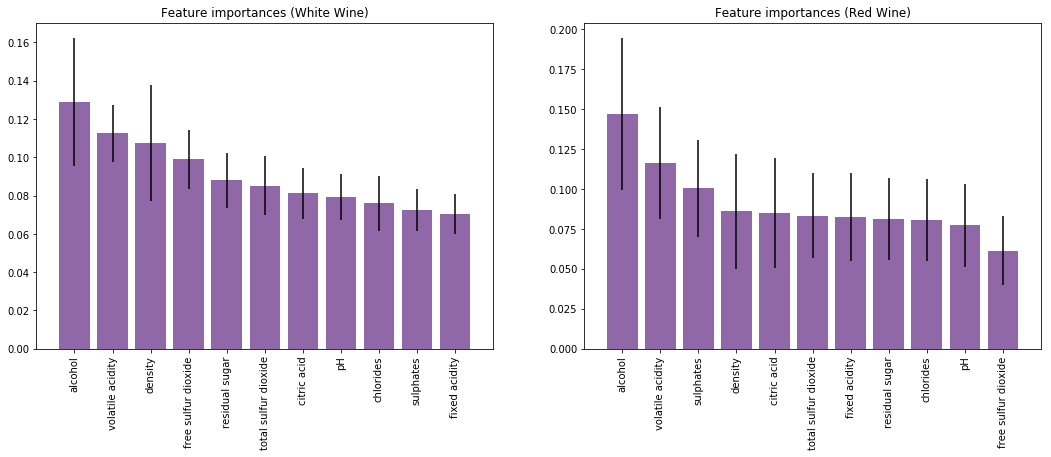

In [88]:
# Plot the feature importances of the white forest
plt.figure(figsize =(18, 6))
plt.subplot(1,2,1)
plt.title("Feature importances (White Wine)")
plt.bar(range(X3w_train.shape[1]), importances_white[indices_white],
       color="#9067a7", yerr=std_white[indices_white], align="center")
plt.xticks(range(X3w_train.shape[1]), indices_white_name, rotation='vertical')
plt.xlim([-1, X3w.shape[1]])

# Plot the feature importances of the red forest
plt.subplot(1,2,2)
plt.title("Feature importances (Red Wine)")
plt.bar(range(X3r_train.shape[1]), importances_red[indices_red],
       color="#9067a7", yerr=std_red[indices_red], align="center")
plt.xticks(range(X3r_train.shape[1]), indices_red_name, rotation='vertical')
plt.xlim([-1, X3r.shape[1]])

## Conclusion

We saw in this notebook some differences between the qualities of various white and red wines using different EDA and visualization techniques. Then using KNN, Random Forest, and SVM, we saw (initially) mediocre results, ranging in the 30s to 60s, when trying to predict wine quality based off of our other features. After trying these initial models, we segmented our data so that we were assigning our wine to 3 categories instead of the initial 6-7. In doing so, the accuracy scores of all of our models increased substantially. We could have segmented our data into 2 categories instead of 3 to increase accuracy further, but at that point we would start to lose information about the true quality of each wine. After this, we tried using a GridSearch on both of our segmented datasets to boost accuracy further, but the results proved not to be drastically different than the previous results obtained without GridSearch. Overall, the Random Forest proved to have the highest accuracy of all our models, getting accuracy scores up to the high 60s on our original data, and scores up to the high 80s on our segmented data. At the end, we looked at the importance of each of our feautres in the Random Forest models, and it appears that the lists for white and red wine are pretty similar. In both cases, alcohol and volatile acidity are marked as the most important features for our models. In the future it would be interesting to use these results to analytically create the highest quality wine possible